# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebook though as you work through this.

First off, let's load the dataset through torchvision.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper

In [2]:
# Define a transform to normalize the data
transform = transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, shuffle=False)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, shuffle=False)

Here we can see one of the images.

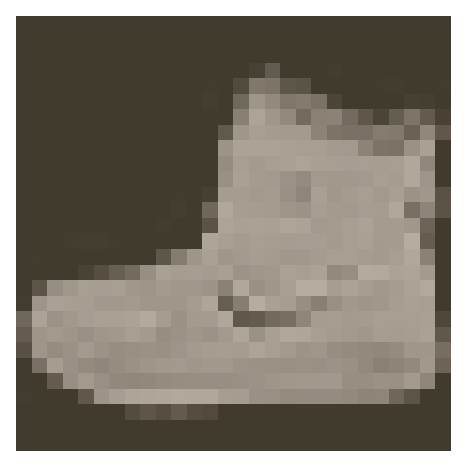

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

With the data loaded, it's time to import the necessary packages.

## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits from the forward pass. It's up to you how many layers you add and the size of those layers.

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.reshape(x.size(0), -1) #.view(-1, 32*7*7)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


model = Net()
model

Net(
  (conv1): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=1568, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [ ]:
epochs = 3
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        #images.resize_(images.size()[0], 784)
        #images = images.unsqueeze(1)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0


Epoch: 1/3...  Loss: 2.3065
Epoch: 1/3...  Loss: 2.2900
Epoch: 1/3...  Loss: 2.2927
Epoch: 1/3...  Loss: 2.2888
Epoch: 1/3...  Loss: 2.2465
Epoch: 1/3...  Loss: 2.2712
Epoch: 1/3...  Loss: 2.2413
Epoch: 1/3...  Loss: 2.1913
Epoch: 1/3...  Loss: 2.1682
Epoch: 1/3...  Loss: 2.0073
Epoch: 1/3...  Loss: 1.9530
Epoch: 1/3...  Loss: 1.6823
Epoch: 1/3...  Loss: 1.7059
Epoch: 1/3...  Loss: 1.6713
Epoch: 1/3...  Loss: 1.7475
Epoch: 1/3...  Loss: 1.3893
Epoch: 1/3...  Loss: 1.2380
Epoch: 1/3...  Loss: 1.3725
Epoch: 1/3...  Loss: 1.1391
Epoch: 1/3...  Loss: 1.2021
Epoch: 1/3...  Loss: 1.3326
Epoch: 1/3...  Loss: 1.3988
Epoch: 1/3...  Loss: 1.1564
Epoch: 1/3...  Loss: 1.3222
Epoch: 1/3...  Loss: 1.3142
Epoch: 1/3...  Loss: 0.9247
Epoch: 1/3...  Loss: 1.1348
Epoch: 1/3...  Loss: 1.3894
Epoch: 1/3...  Loss: 1.2930
Epoch: 1/3...  Loss: 0.9988
Epoch: 1/3...  Loss: 1.0360
Epoch: 1/3...  Loss: 1.2525
Epoch: 1/3...  Loss: 0.8507
Epoch: 1/3...  Loss: 1.2393
Epoch: 1/3...  Loss: 1.1615
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.5484
Epoch: 1/3...  Loss: 0.4743
Epoch: 1/3...  Loss: 0.3573
Epoch: 1/3...  Loss: 0.7465
Epoch: 1/3...  Loss: 0.6751
Epoch: 1/3...  Loss: 0.4946
Epoch: 1/3...  Loss: 0.3821
Epoch: 1/3...  Loss: 0.6142
Epoch: 1/3...  Loss: 0.4766
Epoch: 1/3...  Loss: 0.3166
Epoch: 1/3...  Loss: 0.5142
Epoch: 1/3...  Loss: 0.5263
Epoch: 1/3...  Loss: 0.5544
Epoch: 1/3...  Loss: 0.3643
Epoch: 1/3...  Loss: 0.2843
Epoch: 1/3...  Loss: 0.5635
Epoch: 1/3...  Loss: 0.2677
Epoch: 1/3...  Loss: 0.6969
Epoch: 1/3...  Loss: 0.6361
Epoch: 1/3...  Loss: 0.5049
Epoch: 1/3...  Loss: 0.4912
Epoch: 1/3...  Loss: 0.1789
Epoch: 1/3...  Loss: 0.5727
Epoch: 1/3...  Loss: 0.4458
Epoch: 1/3...  Loss: 0.6342
Epoch: 1/3...  Loss: 0.5468
Epoch: 1/3...  Loss: 0.6837
Epoch: 1/3...  Loss: 0.4360
Epoch: 1/3...  Loss: 0.4760
Epoch: 1/3...  Loss: 0.3853
Epoch: 1/3...  Loss: 0.3824
Epoch: 1/3...  Loss: 0.4338
Epoch: 1/3...  Loss: 0.2688
Epoch: 1/3...  Loss: 0.4366
Epoch: 1/3...  Loss: 0.3221
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.3743
Epoch: 1/3...  Loss: 0.5232
Epoch: 1/3...  Loss: 0.5377
Epoch: 1/3...  Loss: 0.4460
Epoch: 1/3...  Loss: 0.4090
Epoch: 1/3...  Loss: 0.2200
Epoch: 1/3...  Loss: 0.3120
Epoch: 1/3...  Loss: 0.4641
Epoch: 1/3...  Loss: 0.4169
Epoch: 1/3...  Loss: 0.4733
Epoch: 1/3...  Loss: 0.2421
Epoch: 1/3...  Loss: 0.1074
Epoch: 1/3...  Loss: 0.3760
Epoch: 1/3...  Loss: 0.5619
Epoch: 1/3...  Loss: 0.4550
Epoch: 1/3...  Loss: 0.3106
Epoch: 1/3...  Loss: 0.4551
Epoch: 1/3...  Loss: 0.7761
Epoch: 1/3...  Loss: 0.5469
Epoch: 1/3...  Loss: 0.2043
Epoch: 1/3...  Loss: 0.5588
Epoch: 1/3...  Loss: 0.2516
Epoch: 1/3...  Loss: 0.5459
Epoch: 1/3...  Loss: 0.4562
Epoch: 1/3...  Loss: 0.5401
Epoch: 1/3...  Loss: 0.2910
Epoch: 1/3...  Loss: 0.4232
Epoch: 1/3...  Loss: 0.3874
Epoch: 1/3...  Loss: 0.3952
Epoch: 1/3...  Loss: 0.4367
Epoch: 1/3...  Loss: 0.7020
Epoch: 1/3...  Loss: 0.2394
Epoch: 1/3...  Loss: 0.2923
Epoch: 1/3...  Loss: 0.1861
Epoch: 1/3...  Loss: 0.5794
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.1784
Epoch: 1/3...  Loss: 0.3592
Epoch: 1/3...  Loss: 0.3813
Epoch: 1/3...  Loss: 0.3977
Epoch: 1/3...  Loss: 0.2529
Epoch: 1/3...  Loss: 0.2903
Epoch: 1/3...  Loss: 0.4363
Epoch: 1/3...  Loss: 0.4280
Epoch: 1/3...  Loss: 0.3892
Epoch: 1/3...  Loss: 0.1969
Epoch: 1/3...  Loss: 0.2713
Epoch: 1/3...  Loss: 0.4395
Epoch: 1/3...  Loss: 0.2325
Epoch: 1/3...  Loss: 0.4454
Epoch: 1/3...  Loss: 0.4149
Epoch: 1/3...  Loss: 0.7631
Epoch: 1/3...  Loss: 0.3409
Epoch: 1/3...  Loss: 0.2635
Epoch: 1/3...  Loss: 0.5235
Epoch: 1/3...  Loss: 0.4443
Epoch: 1/3...  Loss: 0.4756
Epoch: 1/3...  Loss: 0.3180
Epoch: 1/3...  Loss: 0.1653
Epoch: 1/3...  Loss: 0.5549
Epoch: 1/3...  Loss: 0.3036
Epoch: 1/3...  Loss: 0.5638
Epoch: 1/3...  Loss: 0.5190
Epoch: 1/3...  Loss: 0.1905
Epoch: 1/3...  Loss: 0.4025
Epoch: 1/3...  Loss: 0.4485
Epoch: 1/3...  Loss: 0.2722
Epoch: 1/3...  Loss: 0.5043
Epoch: 1/3...  Loss: 0.5460
Epoch: 1/3...  Loss: 0.3704
Epoch: 1/3...  Loss: 0.4981
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.4086
Epoch: 1/3...  Loss: 0.2763
Epoch: 1/3...  Loss: 0.3315
Epoch: 1/3...  Loss: 0.3393
Epoch: 1/3...  Loss: 0.2675
Epoch: 1/3...  Loss: 0.6806
Epoch: 1/3...  Loss: 0.2529
Epoch: 1/3...  Loss: 0.3164
Epoch: 1/3...  Loss: 0.2722
Epoch: 1/3...  Loss: 0.2608
Epoch: 1/3...  Loss: 0.3390
Epoch: 1/3...  Loss: 0.7374
Epoch: 1/3...  Loss: 0.2941
Epoch: 1/3...  Loss: 0.2666
Epoch: 1/3...  Loss: 0.1793
Epoch: 1/3...  Loss: 0.3602
Epoch: 1/3...  Loss: 0.2651
Epoch: 1/3...  Loss: 0.5170
Epoch: 1/3...  Loss: 0.3592
Epoch: 1/3...  Loss: 0.6063
Epoch: 1/3...  Loss: 0.3655
Epoch: 1/3...  Loss: 0.6817
Epoch: 1/3...  Loss: 0.2062
Epoch: 1/3...  Loss: 0.3117
Epoch: 1/3...  Loss: 0.2228
Epoch: 1/3...  Loss: 0.2428
Epoch: 1/3...  Loss: 0.4464
Epoch: 1/3...  Loss: 0.1868
Epoch: 1/3...  Loss: 0.1728
Epoch: 1/3...  Loss: 0.4030
Epoch: 1/3...  Loss: 0.1962
Epoch: 1/3...  Loss: 0.3594
Epoch: 1/3...  Loss: 0.3969
Epoch: 1/3...  Loss: 0.2680
Epoch: 1/3...  Loss: 0.3566
Epoch: 1/3...  Loss:

Epoch: 1/3...  Loss: 0.3635
Epoch: 1/3...  Loss: 0.3851
Epoch: 1/3...  Loss: 0.2852
Epoch: 1/3...  Loss: 0.2977
Epoch: 1/3...  Loss: 0.2554
Epoch: 1/3...  Loss: 0.5872
Epoch: 1/3...  Loss: 0.3155
Epoch: 1/3...  Loss: 0.3220
Epoch: 1/3...  Loss: 0.2792
Epoch: 1/3...  Loss: 0.5987
Epoch: 1/3...  Loss: 0.3444
Epoch: 1/3...  Loss: 0.2383
Epoch: 1/3...  Loss: 0.4617
Epoch: 1/3...  Loss: 0.3100
Epoch: 1/3...  Loss: 0.1673
Epoch: 1/3...  Loss: 0.2440
Epoch: 1/3...  Loss: 0.3980
Epoch: 1/3...  Loss: 0.2544
Epoch: 1/3...  Loss: 0.1462
Epoch: 1/3...  Loss: 0.4045
Epoch: 1/3...  Loss: 0.1950
Epoch: 1/3...  Loss: 0.3658
Epoch: 1/3...  Loss: 0.5674
Epoch: 1/3...  Loss: 0.4235
Epoch: 1/3...  Loss: 0.2101
Epoch: 1/3...  Loss: 0.2941
Epoch: 1/3...  Loss: 0.4232
Epoch: 1/3...  Loss: 0.5416
Epoch: 1/3...  Loss: 0.3759
Epoch: 1/3...  Loss: 0.3284
Epoch: 1/3...  Loss: 0.3742
Epoch: 1/3...  Loss: 0.3803
Epoch: 1/3...  Loss: 0.5130
Epoch: 1/3...  Loss: 0.2661
Epoch: 1/3...  Loss: 0.2921
Epoch: 1/3...  Loss:

Epoch: 2/3...  Loss: 0.4545
Epoch: 2/3...  Loss: 0.2552
Epoch: 2/3...  Loss: 0.2044
Epoch: 2/3...  Loss: 0.2594
Epoch: 2/3...  Loss: 0.4414
Epoch: 2/3...  Loss: 0.2623
Epoch: 2/3...  Loss: 0.2220
Epoch: 2/3...  Loss: 0.4243
Epoch: 2/3...  Loss: 0.2920
Epoch: 2/3...  Loss: 0.4009
Epoch: 2/3...  Loss: 0.1963
Epoch: 2/3...  Loss: 0.5369
Epoch: 2/3...  Loss: 0.1457
Epoch: 2/3...  Loss: 0.1685
Epoch: 2/3...  Loss: 0.3238
Epoch: 2/3...  Loss: 0.2035
Epoch: 2/3...  Loss: 0.1870
Epoch: 2/3...  Loss: 0.4790
Epoch: 2/3...  Loss: 0.3906
Epoch: 2/3...  Loss: 0.1950
Epoch: 2/3...  Loss: 0.2226
Epoch: 2/3...  Loss: 0.3604
Epoch: 2/3...  Loss: 0.1942
Epoch: 2/3...  Loss: 0.3703
Epoch: 2/3...  Loss: 0.2087
Epoch: 2/3...  Loss: 0.2295
Epoch: 2/3...  Loss: 0.3134
Epoch: 2/3...  Loss: 0.2561
Epoch: 2/3...  Loss: 0.2429
Epoch: 2/3...  Loss: 0.3931
Epoch: 2/3...  Loss: 0.3486
Epoch: 2/3...  Loss: 0.0806
Epoch: 2/3...  Loss: 0.5253
Epoch: 2/3...  Loss: 0.4661
Epoch: 2/3...  Loss: 0.2900
Epoch: 2/3...  Loss:

Epoch: 2/3...  Loss: 0.1931
Epoch: 2/3...  Loss: 0.2355
Epoch: 2/3...  Loss: 0.3457
Epoch: 2/3...  Loss: 0.3513
Epoch: 2/3...  Loss: 0.1691
Epoch: 2/3...  Loss: 0.1739
Epoch: 2/3...  Loss: 0.2129
Epoch: 2/3...  Loss: 0.3884
Epoch: 2/3...  Loss: 0.3595
Epoch: 2/3...  Loss: 0.2994
Epoch: 2/3...  Loss: 0.5881
Epoch: 2/3...  Loss: 0.2312
Epoch: 2/3...  Loss: 0.3523
Epoch: 2/3...  Loss: 0.2171
Epoch: 2/3...  Loss: 0.1197
Epoch: 2/3...  Loss: 0.1565
Epoch: 2/3...  Loss: 0.1983
Epoch: 2/3...  Loss: 0.1282
Epoch: 2/3...  Loss: 0.1255
Epoch: 2/3...  Loss: 0.2855
Epoch: 2/3...  Loss: 0.6565
Epoch: 2/3...  Loss: 0.2756
Epoch: 2/3...  Loss: 0.1655
Epoch: 2/3...  Loss: 0.2686
Epoch: 2/3...  Loss: 0.1465
Epoch: 2/3...  Loss: 0.4224
Epoch: 2/3...  Loss: 0.4184
Epoch: 2/3...  Loss: 0.2771
Epoch: 2/3...  Loss: 0.2982
Epoch: 2/3...  Loss: 0.5884
Epoch: 2/3...  Loss: 0.2546
Epoch: 2/3...  Loss: 0.3021
Epoch: 2/3...  Loss: 0.4987
Epoch: 2/3...  Loss: 0.2728
Epoch: 2/3...  Loss: 0.3649
Epoch: 2/3...  Loss:

Epoch: 2/3...  Loss: 0.2331
Epoch: 2/3...  Loss: 0.4889
Epoch: 2/3...  Loss: 0.5497
Epoch: 2/3...  Loss: 0.5189
Epoch: 2/3...  Loss: 0.2884
Epoch: 2/3...  Loss: 0.3394
Epoch: 2/3...  Loss: 0.3253
Epoch: 2/3...  Loss: 0.1593
Epoch: 2/3...  Loss: 0.5878
Epoch: 2/3...  Loss: 0.2257
Epoch: 2/3...  Loss: 0.1858
Epoch: 2/3...  Loss: 0.2494
Epoch: 2/3...  Loss: 0.2192
Epoch: 2/3...  Loss: 0.4446
Epoch: 2/3...  Loss: 0.4512
Epoch: 2/3...  Loss: 0.4215
Epoch: 2/3...  Loss: 0.2825
Epoch: 2/3...  Loss: 0.2252
Epoch: 2/3...  Loss: 0.3351
Epoch: 2/3...  Loss: 0.2485
Epoch: 2/3...  Loss: 0.1986
Epoch: 2/3...  Loss: 0.3271
Epoch: 2/3...  Loss: 0.3556
Epoch: 2/3...  Loss: 0.4203
Epoch: 2/3...  Loss: 0.3239
Epoch: 2/3...  Loss: 0.3118
Epoch: 2/3...  Loss: 0.0910
Epoch: 2/3...  Loss: 0.2473
Epoch: 2/3...  Loss: 0.2801
Epoch: 2/3...  Loss: 0.1607
Epoch: 2/3...  Loss: 0.3597
Epoch: 2/3...  Loss: 0.0534
Epoch: 2/3...  Loss: 0.3427
Epoch: 2/3...  Loss: 0.2922
Epoch: 2/3...  Loss: 0.4453
Epoch: 2/3...  Loss:

Epoch: 2/3...  Loss: 0.4319
Epoch: 2/3...  Loss: 0.3074
Epoch: 2/3...  Loss: 0.2881
Epoch: 2/3...  Loss: 0.3144
Epoch: 2/3...  Loss: 0.2081
Epoch: 2/3...  Loss: 0.3874
Epoch: 2/3...  Loss: 0.1961
Epoch: 2/3...  Loss: 0.2277
Epoch: 2/3...  Loss: 0.1881
Epoch: 2/3...  Loss: 0.2141
Epoch: 2/3...  Loss: 0.3751
Epoch: 2/3...  Loss: 0.4147
Epoch: 2/3...  Loss: 0.3062
Epoch: 2/3...  Loss: 0.4099
Epoch: 2/3...  Loss: 0.2171
Epoch: 2/3...  Loss: 0.4042
Epoch: 2/3...  Loss: 0.3344
Epoch: 2/3...  Loss: 0.3379
Epoch: 2/3...  Loss: 0.3245
Epoch: 2/3...  Loss: 0.2005
Epoch: 2/3...  Loss: 0.4414
Epoch: 2/3...  Loss: 0.2562
Epoch: 2/3...  Loss: 0.2392
Epoch: 2/3...  Loss: 0.2597
Epoch: 2/3...  Loss: 0.5479
Epoch: 2/3...  Loss: 0.4903
Epoch: 2/3...  Loss: 0.1540
Epoch: 2/3...  Loss: 0.2721
Epoch: 2/3...  Loss: 0.1557
Epoch: 2/3...  Loss: 0.3161
Epoch: 2/3...  Loss: 0.1695
Epoch: 2/3...  Loss: 0.3326
Epoch: 2/3...  Loss: 0.2238
Epoch: 2/3...  Loss: 0.2535
Epoch: 2/3...  Loss: 0.2364
Epoch: 2/3...  Loss:

Epoch: 2/3...  Loss: 0.2662
Epoch: 2/3...  Loss: 0.3771
Epoch: 2/3...  Loss: 0.2600
Epoch: 2/3...  Loss: 0.1997
Epoch: 2/3...  Loss: 0.4055
Epoch: 2/3...  Loss: 0.3358
Epoch: 2/3...  Loss: 0.2825
Epoch: 2/3...  Loss: 0.1936
Epoch: 2/3...  Loss: 0.3460
Epoch: 2/3...  Loss: 0.2803
Epoch: 2/3...  Loss: 0.4463
Epoch: 2/3...  Loss: 0.1381
Epoch: 2/3...  Loss: 0.3306
Epoch: 2/3...  Loss: 0.2338
Epoch: 2/3...  Loss: 0.3660
Epoch: 2/3...  Loss: 0.1663
Epoch: 2/3...  Loss: 0.2656
Epoch: 2/3...  Loss: 0.1896
Epoch: 2/3...  Loss: 0.1446
Epoch: 2/3...  Loss: 0.0466
Epoch: 2/3...  Loss: 0.1851
Epoch: 2/3...  Loss: 0.1968
Epoch: 2/3...  Loss: 0.3075
Epoch: 2/3...  Loss: 0.3476
Epoch: 2/3...  Loss: 0.2115
Epoch: 2/3...  Loss: 0.1154
Epoch: 2/3...  Loss: 0.3061
Epoch: 2/3...  Loss: 0.2718
Epoch: 2/3...  Loss: 0.1893
Epoch: 2/3...  Loss: 0.3192
Epoch: 2/3...  Loss: 0.3565
Epoch: 2/3...  Loss: 0.0991
Epoch: 2/3...  Loss: 0.4539
Epoch: 2/3...  Loss: 0.3435
Epoch: 2/3...  Loss: 0.1742
Epoch: 2/3...  Loss:

Epoch: 3/3...  Loss: 0.1464
Epoch: 3/3...  Loss: 0.2219
Epoch: 3/3...  Loss: 0.3876
Epoch: 3/3...  Loss: 0.3195
Epoch: 3/3...  Loss: 0.2889
Epoch: 3/3...  Loss: 0.2909
Epoch: 3/3...  Loss: 0.1187
Epoch: 3/3...  Loss: 0.2104
Epoch: 3/3...  Loss: 0.2939
Epoch: 3/3...  Loss: 0.2920
Epoch: 3/3...  Loss: 0.5454
Epoch: 3/3...  Loss: 0.3165
Epoch: 3/3...  Loss: 0.2233
Epoch: 3/3...  Loss: 0.3395
Epoch: 3/3...  Loss: 0.2482
Epoch: 3/3...  Loss: 0.2619
Epoch: 3/3...  Loss: 0.2213
Epoch: 3/3...  Loss: 0.1768
Epoch: 3/3...  Loss: 0.1340
Epoch: 3/3...  Loss: 0.2921
Epoch: 3/3...  Loss: 0.3807
Epoch: 3/3...  Loss: 0.1338
Epoch: 3/3...  Loss: 0.3973
Epoch: 3/3...  Loss: 0.1973
Epoch: 3/3...  Loss: 0.4068
Epoch: 3/3...  Loss: 0.4833
Epoch: 3/3...  Loss: 0.3130
Epoch: 3/3...  Loss: 0.3350
Epoch: 3/3...  Loss: 0.2098
Epoch: 3/3...  Loss: 0.2115
Epoch: 3/3...  Loss: 0.1640
Epoch: 3/3...  Loss: 0.2586
Epoch: 3/3...  Loss: 0.4821
Epoch: 3/3...  Loss: 0.3547
Epoch: 3/3...  Loss: 0.2803
Epoch: 3/3...  Loss:

Epoch: 3/3...  Loss: 0.3800
Epoch: 3/3...  Loss: 0.2440
Epoch: 3/3...  Loss: 0.4038
Epoch: 3/3...  Loss: 0.2140
Epoch: 3/3...  Loss: 0.3227
Epoch: 3/3...  Loss: 0.0973
Epoch: 3/3...  Loss: 0.2911
Epoch: 3/3...  Loss: 0.0927
Epoch: 3/3...  Loss: 0.3105
Epoch: 3/3...  Loss: 0.4320
Epoch: 3/3...  Loss: 0.2332
Epoch: 3/3...  Loss: 0.2788
Epoch: 3/3...  Loss: 0.2077
Epoch: 3/3...  Loss: 0.3316
Epoch: 3/3...  Loss: 0.3500
Epoch: 3/3...  Loss: 0.2259
Epoch: 3/3...  Loss: 0.4162
Epoch: 3/3...  Loss: 0.3609
Epoch: 3/3...  Loss: 0.3840
Epoch: 3/3...  Loss: 0.2218
Epoch: 3/3...  Loss: 0.1662
Epoch: 3/3...  Loss: 0.2948
Epoch: 3/3...  Loss: 0.2237
Epoch: 3/3...  Loss: 0.1174
Epoch: 3/3...  Loss: 0.1191
Epoch: 3/3...  Loss: 0.2446
Epoch: 3/3...  Loss: 0.1499
Epoch: 3/3...  Loss: 0.2529
Epoch: 3/3...  Loss: 0.2481
Epoch: 3/3...  Loss: 0.5379
Epoch: 3/3...  Loss: 0.1435
Epoch: 3/3...  Loss: 0.1189
Epoch: 3/3...  Loss: 0.4005
Epoch: 3/3...  Loss: 0.1040
Epoch: 3/3...  Loss: 0.2498
Epoch: 3/3...  Loss:

Epoch: 3/3...  Loss: 0.1094
Epoch: 3/3...  Loss: 0.0683
Epoch: 3/3...  Loss: 0.1604
Epoch: 3/3...  Loss: 0.1666
Epoch: 3/3...  Loss: 0.5206
Epoch: 3/3...  Loss: 0.3379
Epoch: 3/3...  Loss: 0.3652
Epoch: 3/3...  Loss: 0.0973
Epoch: 3/3...  Loss: 0.2013
Epoch: 3/3...  Loss: 0.3385
Epoch: 3/3...  Loss: 0.4858
Epoch: 3/3...  Loss: 0.3901
Epoch: 3/3...  Loss: 0.0827
Epoch: 3/3...  Loss: 0.3687
Epoch: 3/3...  Loss: 0.3525
Epoch: 3/3...  Loss: 0.1677
Epoch: 3/3...  Loss: 0.1989
Epoch: 3/3...  Loss: 0.1629
Epoch: 3/3...  Loss: 0.1271
Epoch: 3/3...  Loss: 0.1464
Epoch: 3/3...  Loss: 0.2607
Epoch: 3/3...  Loss: 0.1921
Epoch: 3/3...  Loss: 0.3756
Epoch: 3/3...  Loss: 0.4747
Epoch: 3/3...  Loss: 0.1757
Epoch: 3/3...  Loss: 0.1363
Epoch: 3/3...  Loss: 0.1552
Epoch: 3/3...  Loss: 0.4463
Epoch: 3/3...  Loss: 0.2164
Epoch: 3/3...  Loss: 0.1953
Epoch: 3/3...  Loss: 0.2149
Epoch: 3/3...  Loss: 0.1663
Epoch: 3/3...  Loss: 0.3772
Epoch: 3/3...  Loss: 0.1353
Epoch: 3/3...  Loss: 0.2603
Epoch: 3/3...  Loss:

Epoch: 3/3...  Loss: 0.0805
Epoch: 3/3...  Loss: 0.3219
Epoch: 3/3...  Loss: 0.2741
Epoch: 3/3...  Loss: 0.2119
Epoch: 3/3...  Loss: 0.4832
Epoch: 3/3...  Loss: 0.1137
Epoch: 3/3...  Loss: 0.1344
Epoch: 3/3...  Loss: 0.2446
Epoch: 3/3...  Loss: 0.3327
Epoch: 3/3...  Loss: 0.2626
Epoch: 3/3...  Loss: 0.3389
Epoch: 3/3...  Loss: 0.1891
Epoch: 3/3...  Loss: 0.1814
Epoch: 3/3...  Loss: 0.1486
Epoch: 3/3...  Loss: 0.2847
Epoch: 3/3...  Loss: 0.2413
Epoch: 3/3...  Loss: 0.2281
Epoch: 3/3...  Loss: 0.1721
Epoch: 3/3...  Loss: 0.3680
Epoch: 3/3...  Loss: 0.1602
Epoch: 3/3...  Loss: 0.4775
Epoch: 3/3...  Loss: 0.2437
Epoch: 3/3...  Loss: 0.1164
Epoch: 3/3...  Loss: 0.1815
Epoch: 3/3...  Loss: 0.1292
Epoch: 3/3...  Loss: 0.2112
Epoch: 3/3...  Loss: 0.0660
Epoch: 3/3...  Loss: 0.2385
Epoch: 3/3...  Loss: 0.1683
Epoch: 3/3...  Loss: 0.1001
Epoch: 3/3...  Loss: 0.1602
Epoch: 3/3...  Loss: 0.5260
Epoch: 3/3...  Loss: 0.5719
Epoch: 3/3...  Loss: 0.2060
Epoch: 3/3...  Loss: 0.6045
Epoch: 3/3...  Loss:

In [ ]:
images.shape

In [9]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
images.unsqueeze(1)

with torch.no_grad():
    logits = model.forward(images)

# Calculate the class probabilities (softmax) for img
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(images.resize_(1, 784), ps, version='Fashion')

In [10]:
images.shape

torch.Size([1, 1, 28, 28])

Now that your network is trained, you'll want to save it to disk so you can load it later instead of training it again. Obviously, it's impractical to train a network every time you need one. In practice, you'll train it once, save the model, then reload it for further training or making predictions. In the next part, I'll show you how to save and load trained models.